## Proyecto de Machine Learning sobre la base de datos de Seatle Housing

Para este mini proyecto, se busca aplicar los diversos temas de "Machine Learning" y "Data Science" que se han visto en los últimos dos módulos del diplomado.

Realizaremos un analisis exploratorio inicial, para luego seguir con algo más predictivo basado en distintos modelos de machine learning de la biblioteca de `sklearn`.

Como primer paso, importamos todas las bibliotecas necesarias para realizar el proyecto

In [182]:
# Data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import randn, seed
from ipywidgets import interact, FloatSlider

# Machine Learning libraries
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
# Models
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
# Scores
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

# Other libraries
import sys
sys.path.append("../files")
import utils

# Configurations
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 13

Cargamos la base de datos necesaria para el proyecto y comenzamos con el análisis exploratorio correspondiente.

In [2]:
import pandas as pd
housing = pd.read_csv("train.zip")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.shape

(1460, 81)

Esta base de datos cuenta con un tamaño total de 1460 registros con 81 variables, las cuales podemos observar en la siguiente lista:

In [4]:
for i in range(int(housing.shape[1]/9)):
    print(housing.columns.tolist()[i*9:(i+1)*9])

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour']
['Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual']
['OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea']
['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF']
['LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual']
['TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea']
['GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
[

La base consta de 80 variables que describen diversos aspectos de viviendas en Seatle.

Una descripción más detallada de esta base de datos la podemos hallar aquí abajo

In [5]:
pd.set_option('display.max_columns', 500)
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing.describe().shape

(8, 38)

En primera instancia podemos notar que contamos con 38 variables numéricas, las cuales están descritas arriba y hablan sobre el número de cuartos con los que cuenta el inmueble, áreas de los espacios, pisos, año de remodelación, y demás descripciones específicas para cada una de estas viviendas. La última variable nos sirve para identificar el valor de la propiedad, la cual trataremos de predecir basados en las distintas variables con las que cuenta la base de datos.

In [7]:
housing.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

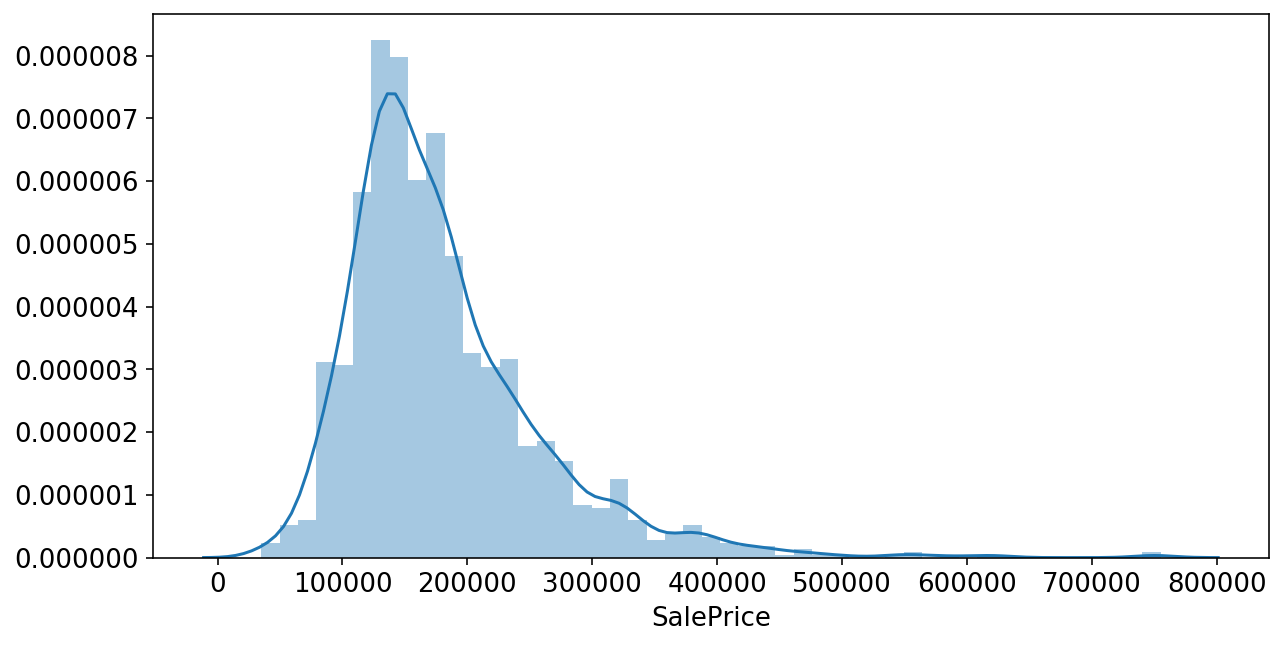

In [8]:
sns.distplot(housing.SalePrice, kde=True);

Podemos ver un poco más el detalle de toda la base de datos con la siguiente función:

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Debido a la información que nos arroja la función arriba invocada, podemos notar que exiten variables con entradas nulas, por lo que tendremos que inputarle valores más adelante

Continuando con el análisis exploratorio, podemos visualizar la relación que tienen las variables categóricas y las numéricas para poder seleccionar las variables de mayor relevancia y que menor correlación tienen entre sí para poder optimizar el poder predictivo del modelo

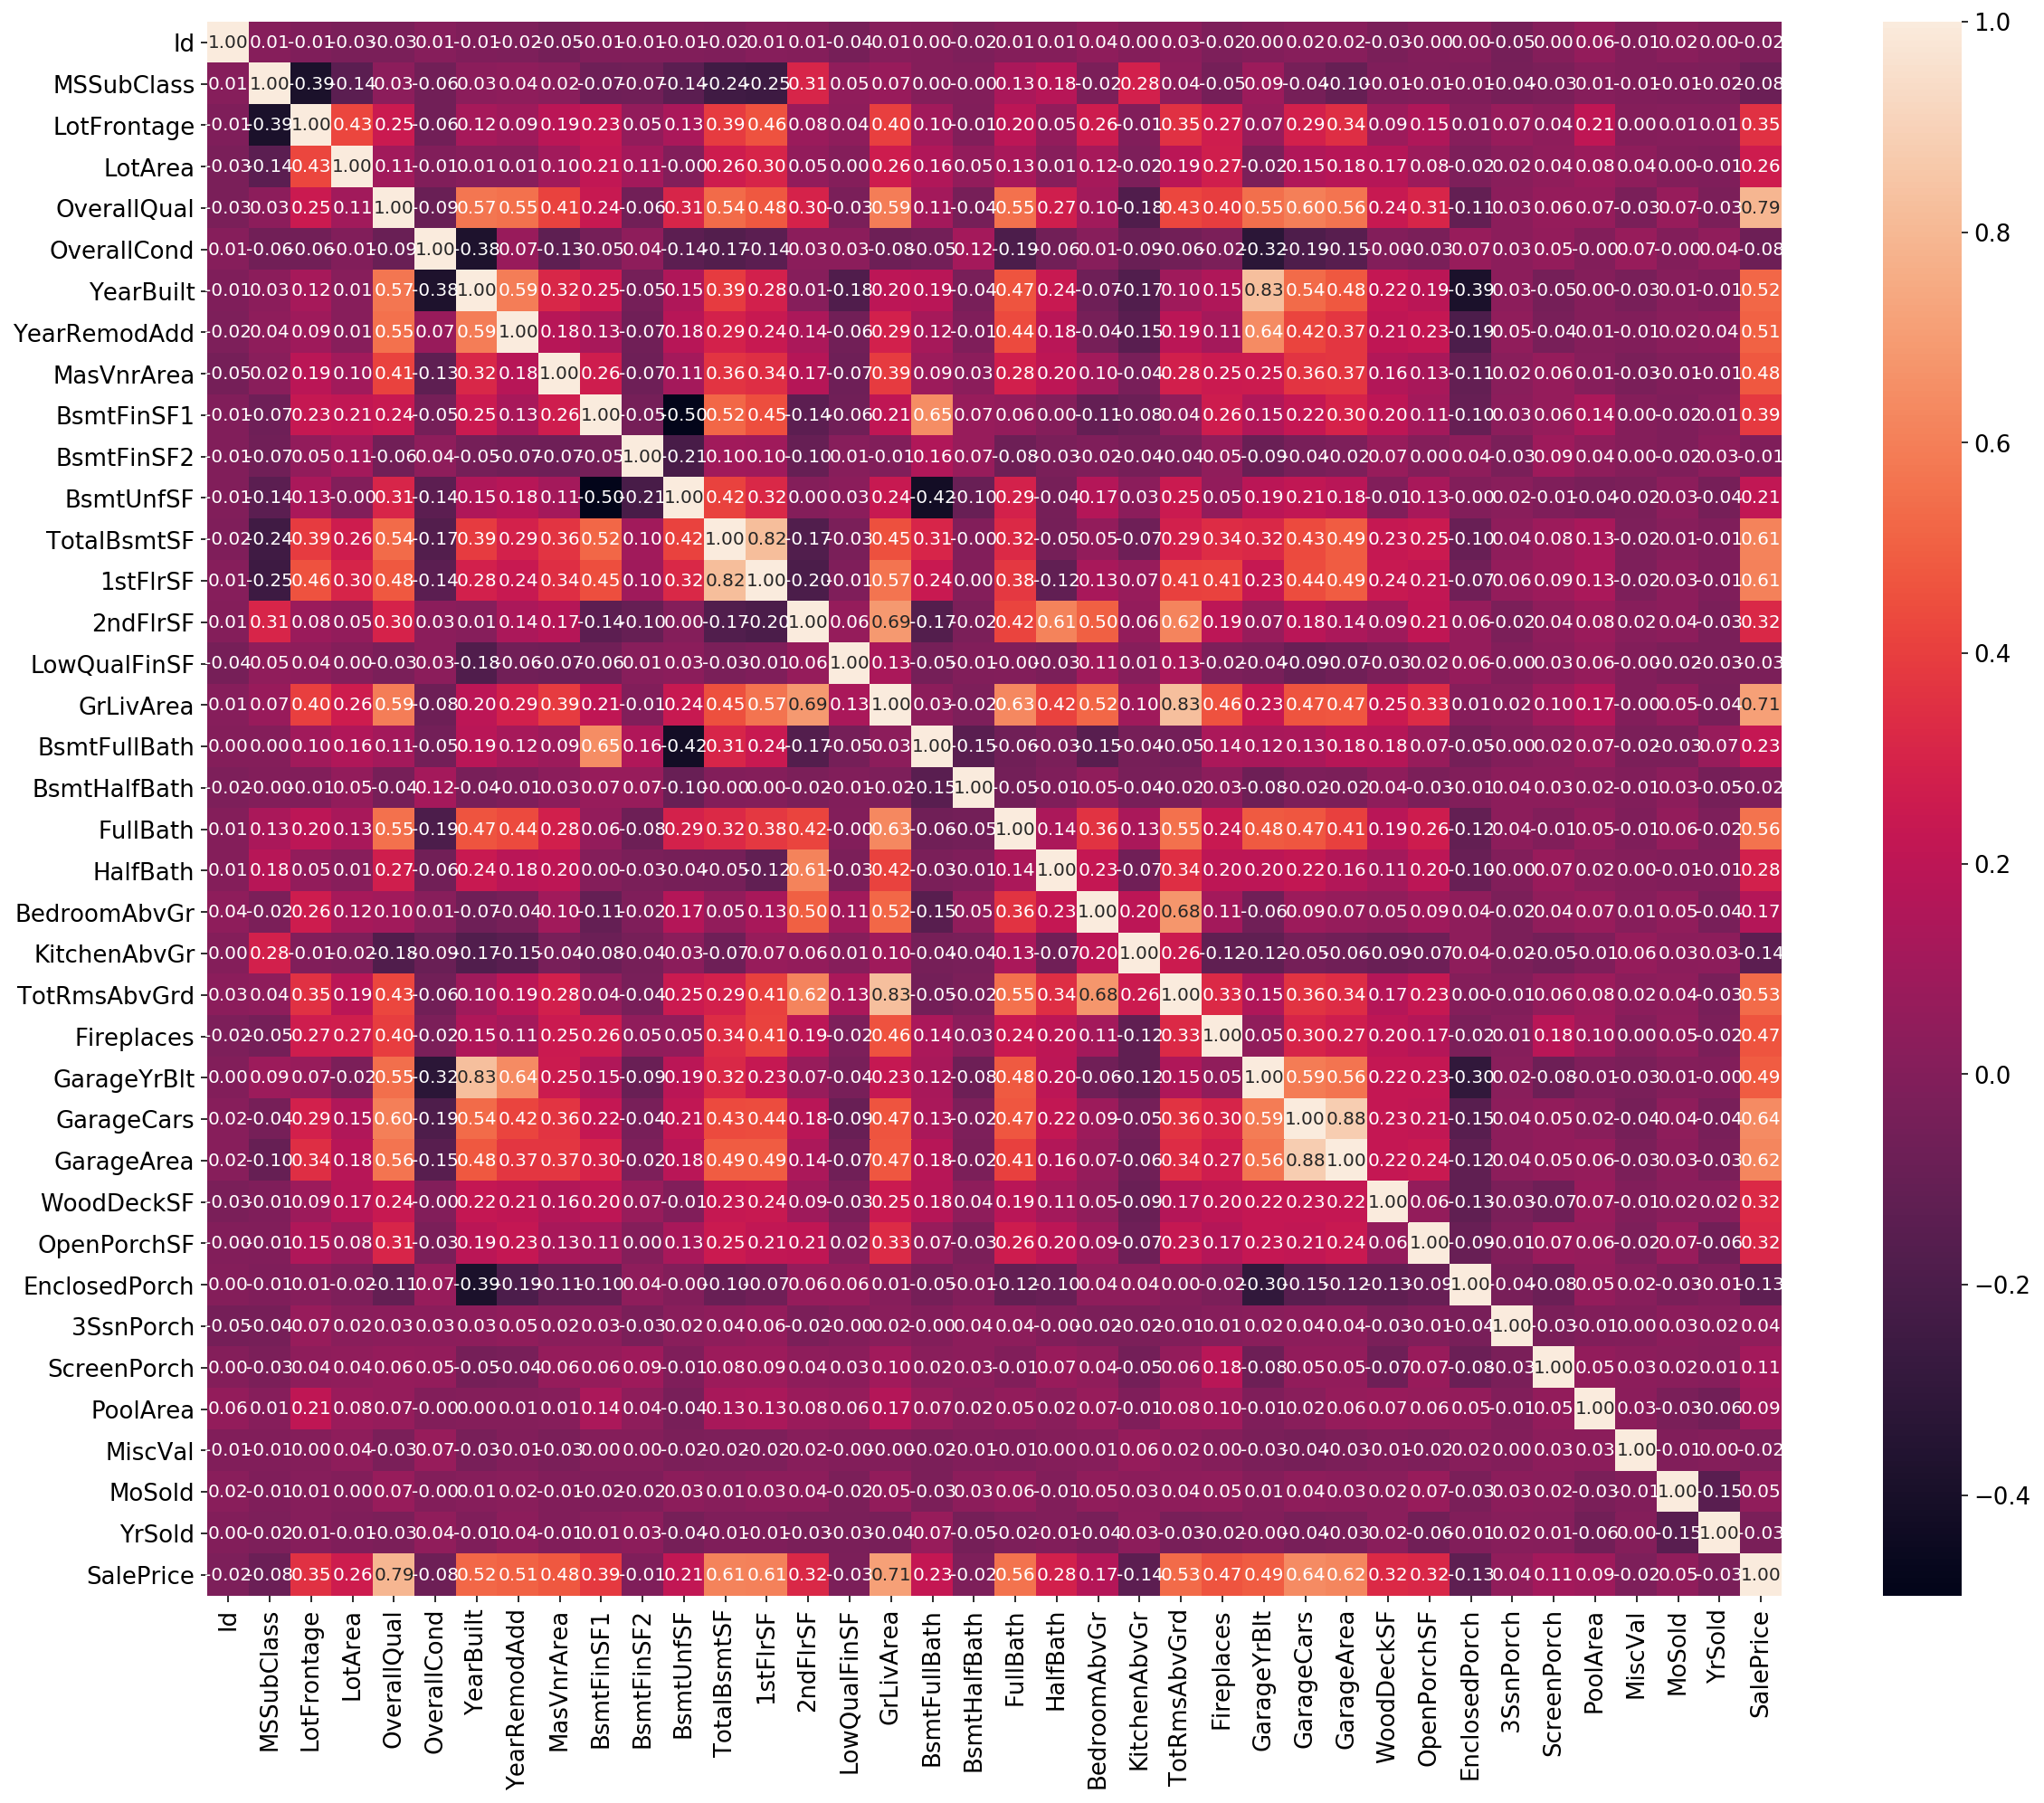

In [10]:
#correlation matrix
corrmat = housing.corr()
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});
plt.show()

Podemos ver como se relacionan ciertas variable numéricas que se podrían considerar de mayor relevancia por la naturaleza del modelo

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


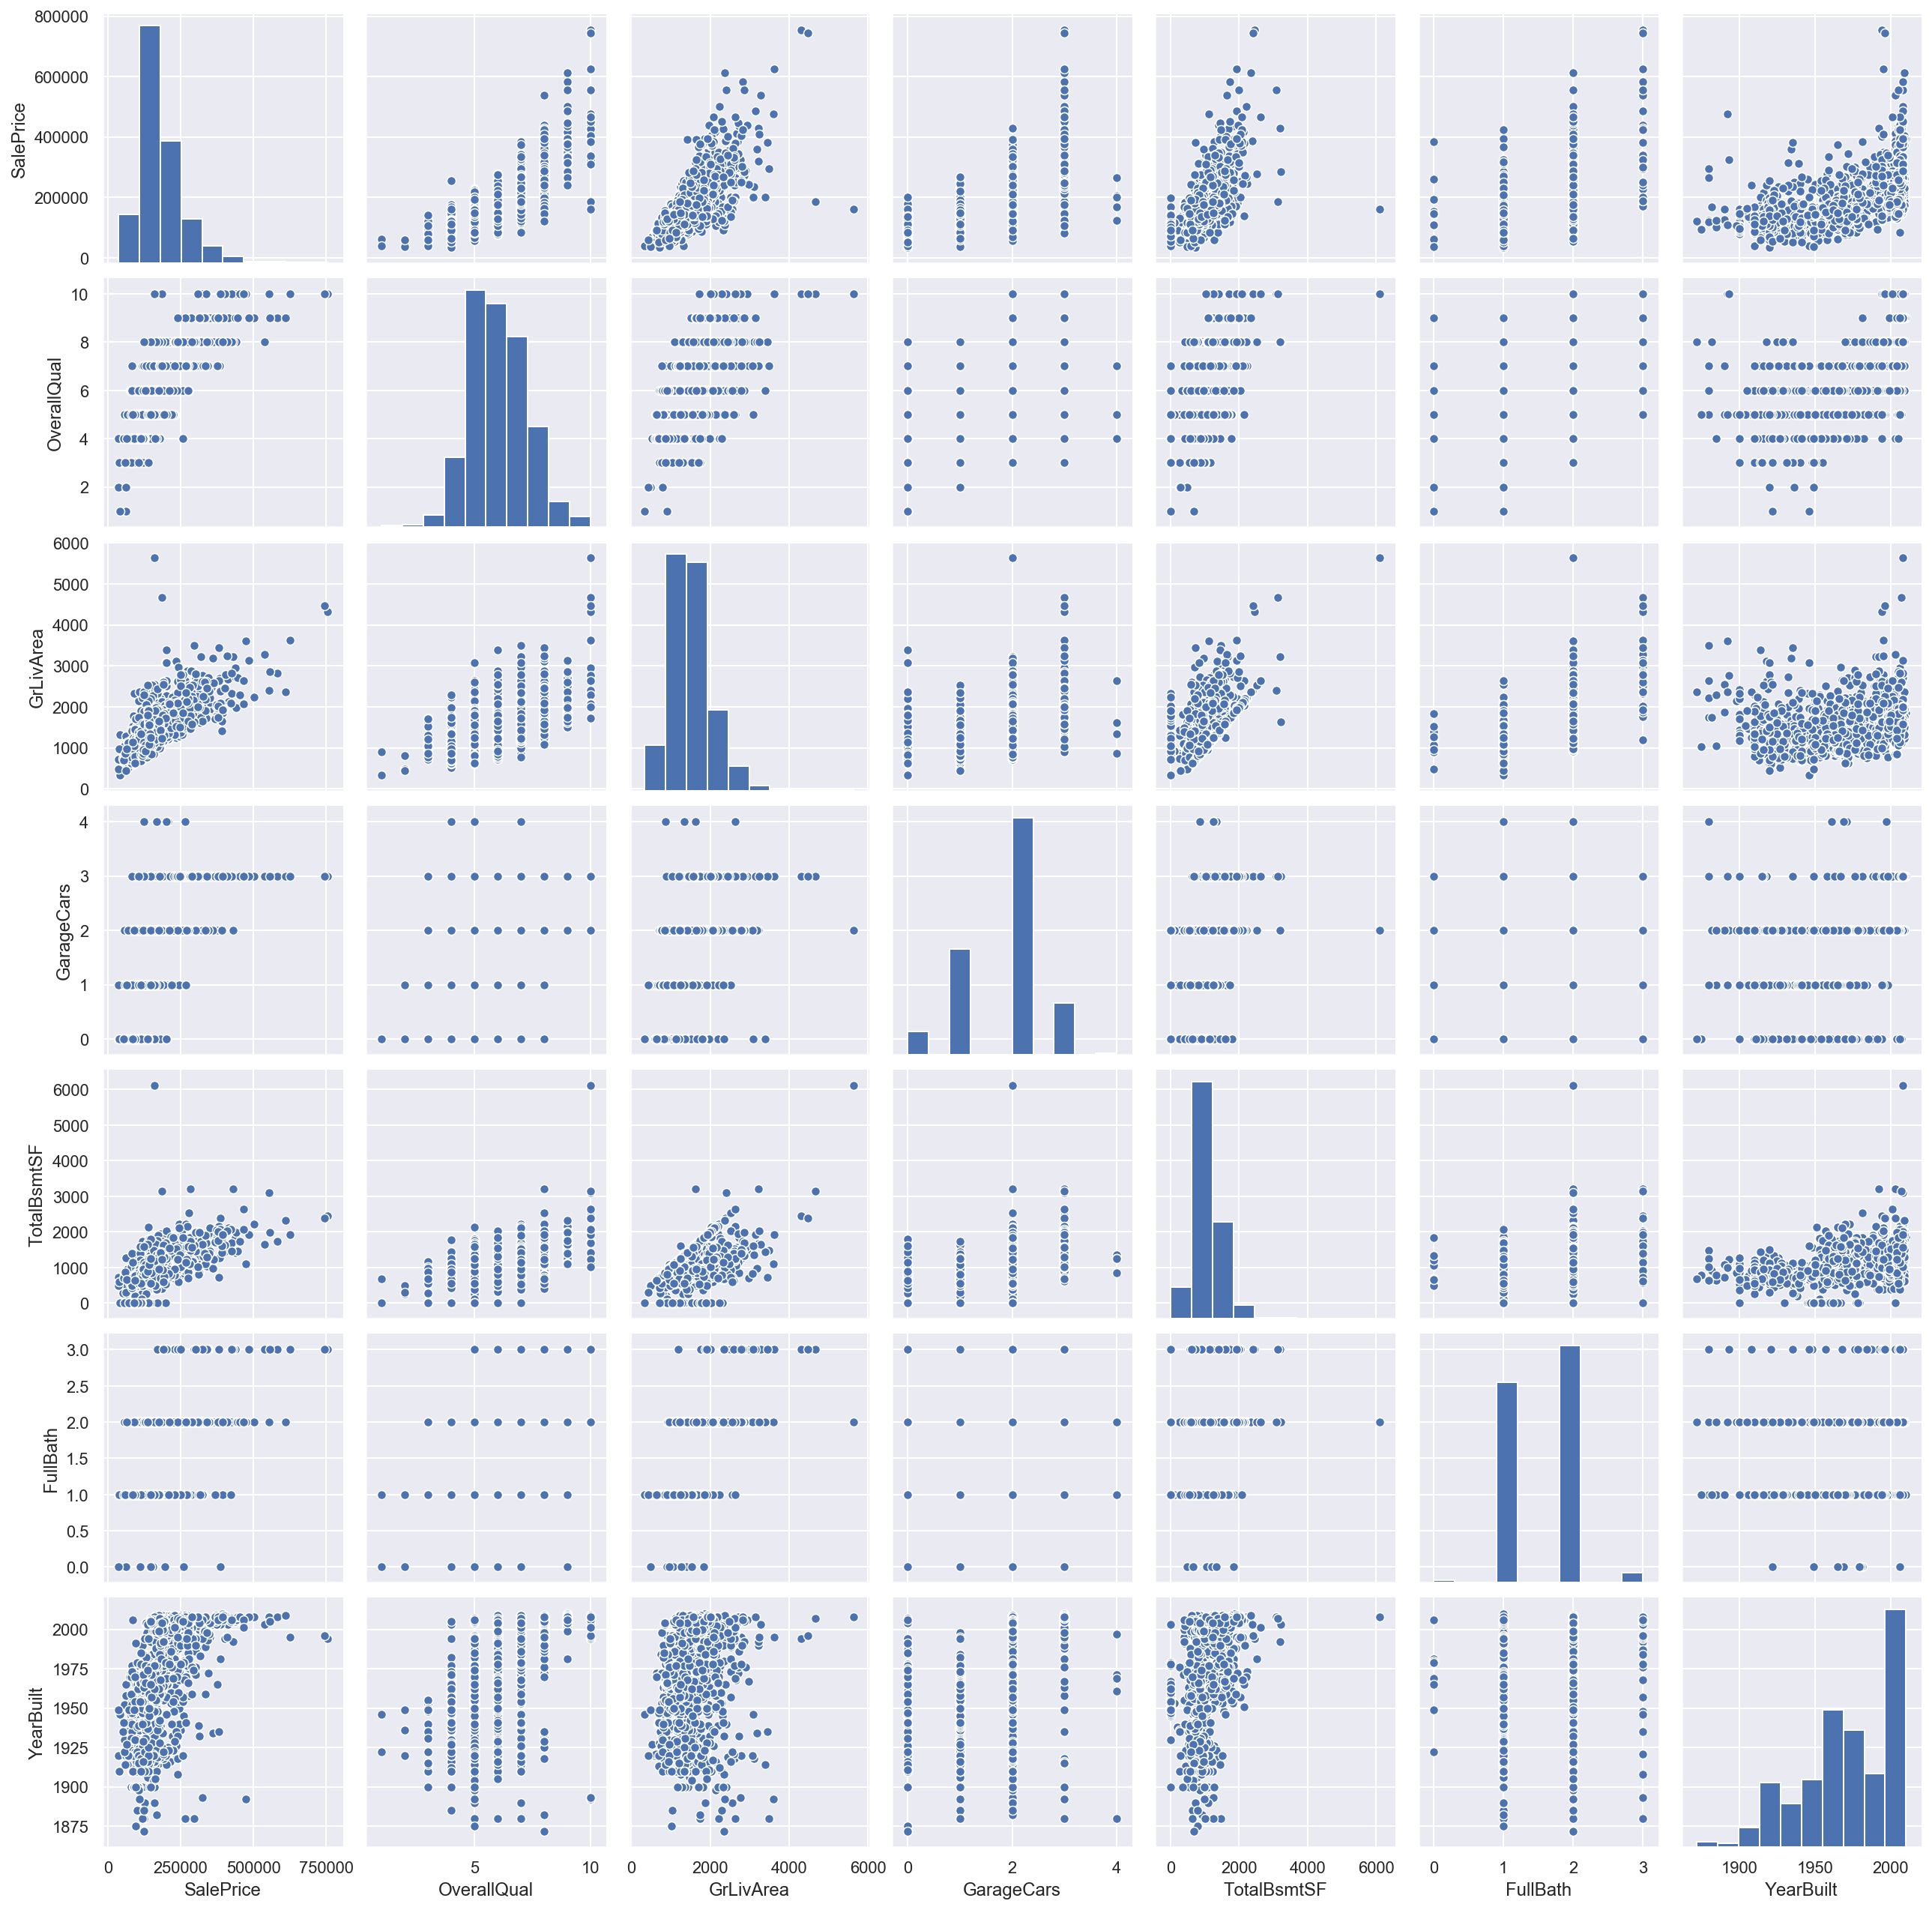

In [41]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[cols], size = 2.5)
plt.show();

Como primer acercamiento usamos el modelo visto en clase para compararlo más tarde con los demás modelos de machine learning que podamos probar.

Para este primer caso lo que se usa es un modelo de regresión lineal con Lasso. Esta variación incluirá la mayoría de las variables que se consideran en la base de datos original.

### Regresión lineal con Lasso (ejemplo de la clase)

In [23]:
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include="float"))]
)

pipe = Pipeline([
    ("select_cols", column_selector),
    ("lasso", Lasso(alpha=0.1, tol=0.5))
])

In [24]:
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]

cv = cross_validate(pipe, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2 = cv["test_r2"]
mae = -cv["test_neg_mean_absolute_error"]

In [25]:
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")

mean r2: 0.44
mean mae: 41,749.60


### Regresión lineal con Lasso (agregando más columnas)

Para este ejemplo en particular estamos considerando todas aquellas columnas que tienen datos numéricos, más las dos columnas que el ejemplo anterior estaba considerando

In [32]:
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include=np.number))]
)

pipe = Pipeline([
    ("select_cols", column_selector),
    ("lasso", Lasso(alpha=0.1, tol=0.5))
])

In [33]:
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]

cv = cross_validate(pipe, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2 = cv["test_r2"]
mae = -cv["test_neg_mean_absolute_error"]

In [35]:
column_selector.fit_transform(xtrain).shape

(1168, 48)

In [34]:
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")

mean r2: 0.76
mean mae: 24,475.51


Podemos notar que el puntaje para el conjunto de entrenamiento mejoró considerablemente cuando consideramos más variables.

### Regresión lineal con Lasso (agregando todas las columnas)

Ahora consideraremos todas las variables para ver que tan buenos resultados nos arroja la regresión lineal con Lasso.

Para esto agregamos a nuestro transformador de columnas todas las variables que aparecen como objeto.

In [100]:
# Estas son las variables categóricas
columnas_cat = housing.dtypes[housing.dtypes == object].index.tolist()
print( columnas_cat )

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [124]:
# Estas son las variables numéricas sin considerar la variable objetivo
columnas_num = housing.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.tolist()
columnas_num.pop()
print( columnas_num )

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


_

Debido a que algunas variables tienen valores nulos consideramos el siguiente cambio a l preprocesamiento de los datos por separado para lidiar con los valores nulos de las variables categóricas.

In [125]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = columnas_num
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categorical_features = columnas_cat
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [126]:
# Creamos el pipeline con el preprocesamiento indicado arriba y el modelo Lasso para este caso
pipe = Pipeline([
    ("preprocess", preprocessor),
    ("lasso", Lasso(alpha=0.1, tol=0.5))
])

In [141]:
preprocessor.fit_transform(housing).shape

(1460, 305)

In [130]:
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]

cv = cross_validate(pipe, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2 = cv["test_r2"]
mae = -cv["test_neg_mean_absolute_error"]

In [132]:
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")

mean r2: 0.67
mean mae: 28,988.38


Aquí el puntaje no logró mejorar, sin embargo habrá que tomar en consideración otros transformadores o modelos para su mejora.

En la siguiente gráfica podemos notar los diferentes scores que nos da cada uno de los diferentes modelos usados en el modulo. Como consideración principal es que usaremos el `preprocessor`  creado en el ejemplo anterior para considerar todas las variables tanto numéricas como categóricas.

In [164]:
# Creamos una función principal para alimentar un ciclo con cada modelo que elijamos y que nos devuelve los scores que estamos evaluando.

def scores_modelos(modelo, transformador = None):
    if transformador is None:
        # Pipeline principal
        pipe = Pipeline([
            ("preprocess", preprocessor),
            ("model", modelo)
        ])
    else:
        # Pipeline principal
        pipe = Pipeline([
            ("preprocess", preprocessor),
            ("poly_transform", transformador),
            ("model", modelo)
        ])
        
    cv = cross_validate(pipe, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
    r2 = cv["test_r2"]
    mae = -cv["test_neg_mean_absolute_error"]
    
    return r2.mean(), mae.mean()

In [165]:
# Ejemplos de la aplicación de la función de arriba

a, b = scores_modelos(Ridge(alpha=0.1, tol=0.5))

print(f"mean r2: {a:0.2f}")
print(f"mean mae: {b:,.2f}")

c, d = scores_modelos(Ridge(alpha=0.1, tol=0.5), PolynomialFeatures(degree=2, include_bias=True))

print(f"mean r2: {c:0.2f}")
print(f"mean mae: {d:,.2f}")

mean r2: 0.81
mean mae: 18,723.74
mean r2: 0.77
mean mae: 21,181.69


In [183]:
# OBTENEMOS LOS PUNTAJES PARA LOS DISTINTOS MODELOS INVOCADOS ABAJO.

modelos_nombres = ['Lasso', 'Ridge', 'Arbol_Desicion','SVM', 'Voting', 'Bagging', 'Random_forest', 'Boosting']

modelos = [Lasso(alpha=0.1, tol=0.5), Ridge(alpha=0.1, tol=0.5), DecisionTreeClassifier(max_depth=5, random_state=314), SVC(C=np.inf, kernel="rbf"), \
          VotingClassifier([("logreg", LogisticRegression(C=1)), SVC(C=1, kernel="linear", probability=True), ("tree", DecisionTreeClassifier(max_depth=3))], voting="soft"), \
          BaggingClassifier(DecisionTreeClassifier(random_state=2718), n_estimators=400, bootstrap=True, max_samples=100, n_jobs=-1), \
          RandomForestClassifier(n_estimators=400, random_state=314, n_jobs=-1, oob_score=False), \
          AdaBoostClassifier(n_estimators=100, random_state=314)]

r2_s, mae_s = [], []
for m in modelos:
    a, b = scores_modelos(m)
    r2_s.append(a)
    mae_s.append(b)

e:\Users\fgarciaro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
e:\Users\fgarciaro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
e:\Users\fgarciaro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
e:\Users\fgarciaro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

Gráfica de la media de los scores $ R^2 $  para la validación cruzada

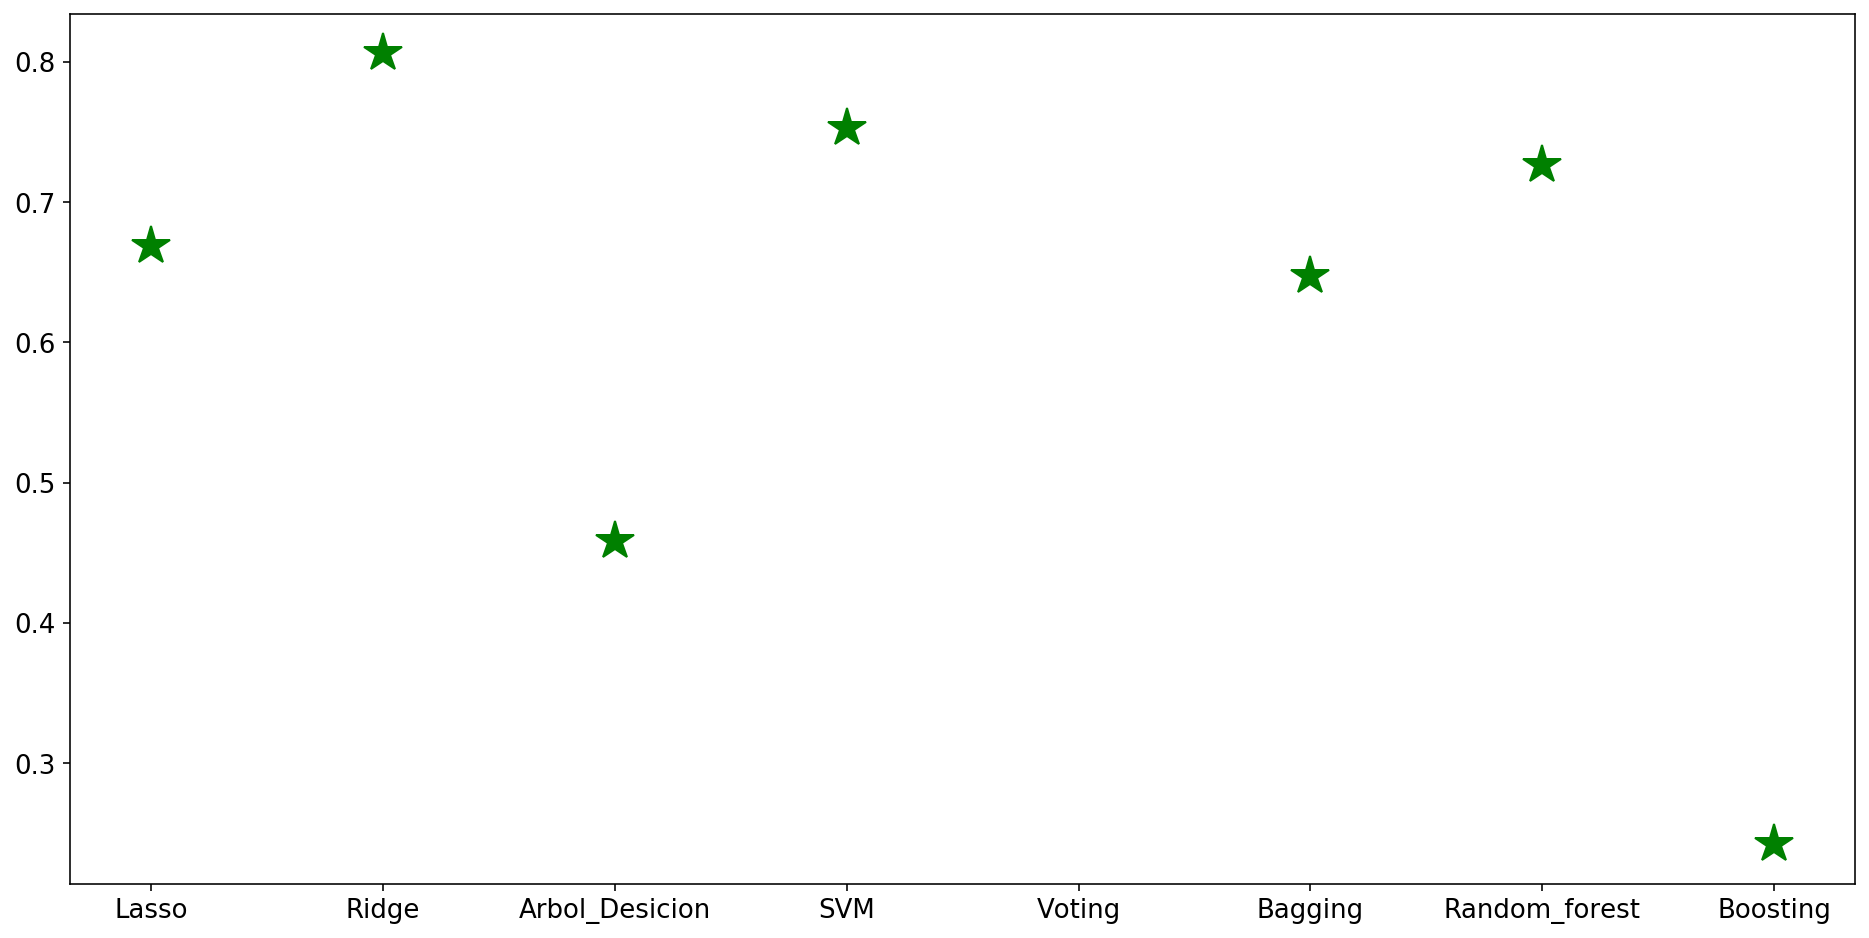

In [197]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.plot(modelos_nombres , r2_s, linestyle = 'None', color='green', marker='*', markersize=20);

Gráfica de la media de los scores $ MAE $  para la validación cruzada

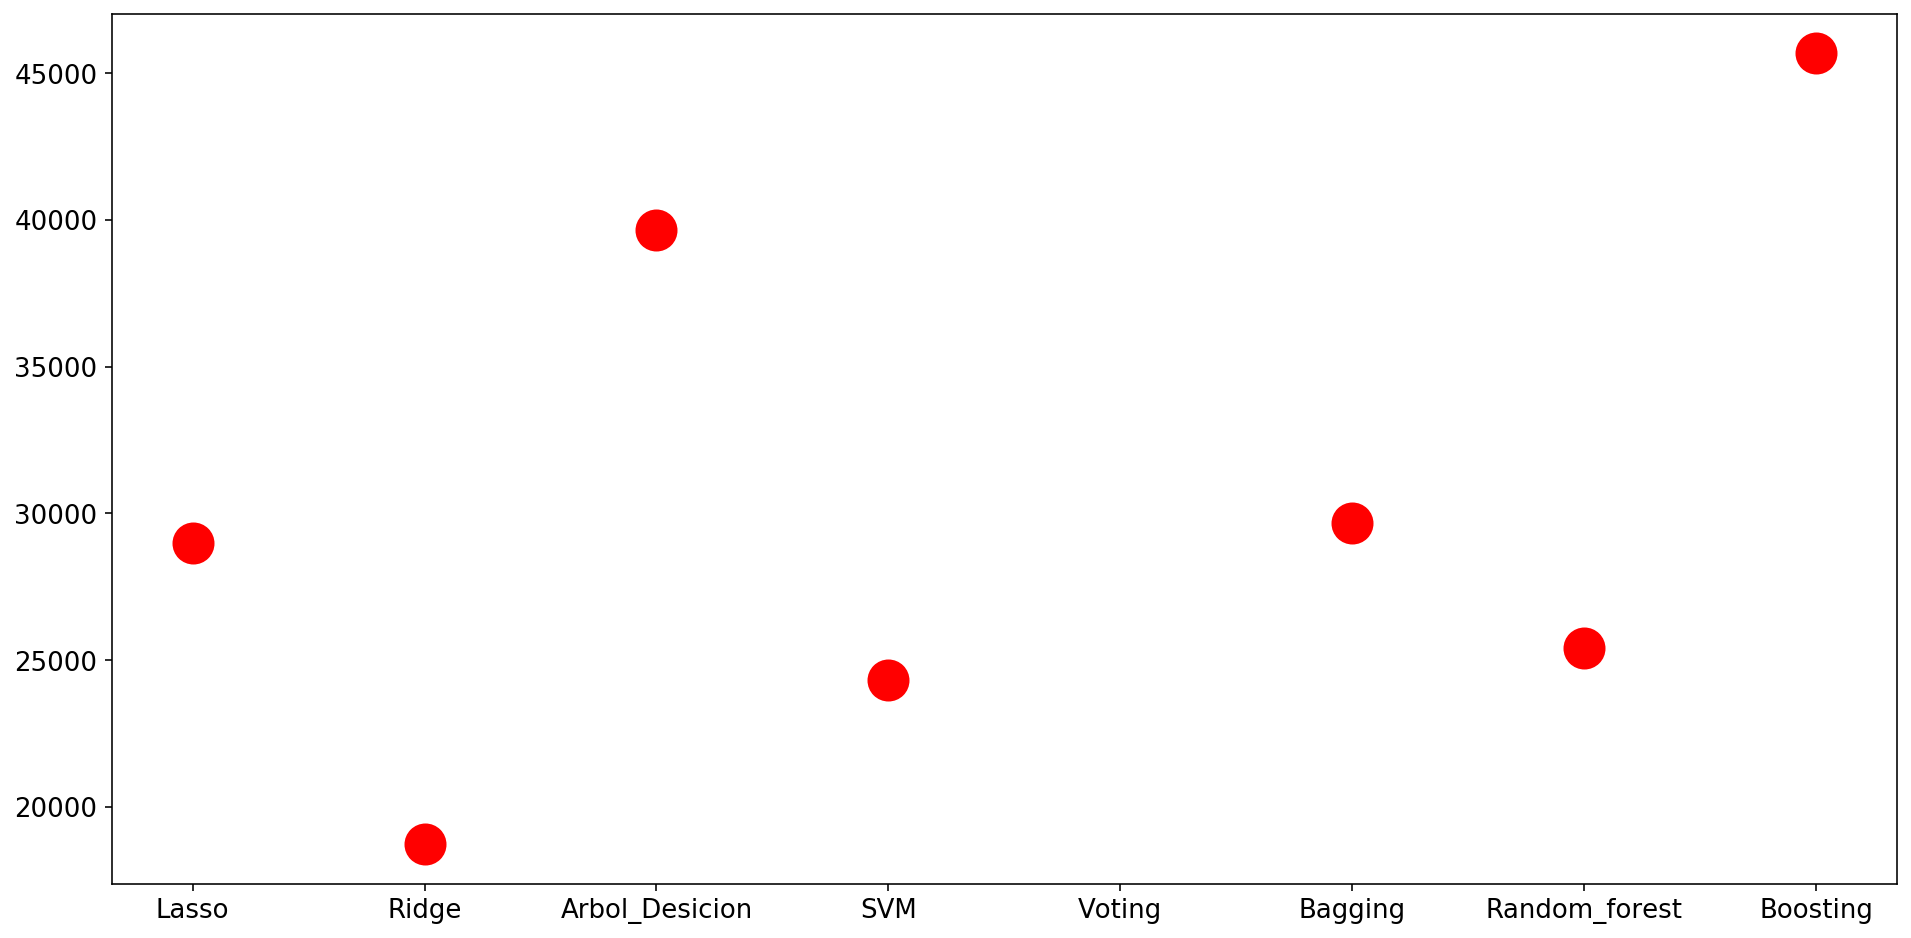

In [198]:
plt.plot(modelos_nombres , mae_s, linestyle = 'None', color='red', marker='o', markersize=20);

### Conclusión

Haciendo uso de diversos modelos, pudimos ver el poder de clasificación de diversos modelos para el conjunto de datos propuesto.

De acuerdo a las distintos resultados obtenidos, podemos asegurar que el modelo Ridge es el mejor candidato como modelo para clasificar este conjunto de datos.